Read iris.names file

In [1]:
import pandas as pd
irisName = open("iris.names","r")
print(irisName.read())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

So our dataset which is stored in iris.data has 5 attributes. Attribute 1-4 are numeric which represent length and width of sepal and petal; The 5th attribute is categorical attribute which is the class name of that particular observation. Format of each observation or row is -sepal length- -sepal width- -petal length- -petal width- -class name-. The dataset has 150 rows.

In [2]:
irisData = pd.read_csv("iris.data", header = None) #the dataset has no header, so parameter for header assigned as "None". This line is to read the iris.data file in csv format without header
irisData.columns = ['sp_len', 'sp_wid', 'pt_len', 'pt_wid','class'] #add header by an anonymous list of header names
irisData.head()

,sp_len,sp_wid,pt_len,pt_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = irisData.drop('class', axis = 1) #this to define the dataframe including sp_len, sp_wid, pt_len, pt_wid which are features used to predict the class
df.head()

,sp_len,sp_wid,pt_len,pt_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


That is done for data splitting. As this project idea is to categorically predict the class of a particular flower base on their setal and petal sizes. So I decide to use decision tree, support vector machines, and neural network then base on value accuracy, the most suitable model among those three will be determined.

Now we prepare the data for our decision tree model

In [4]:
import numpy as np
classLabel = np.array(irisData['class']) #the class label is list contains of all values of the column named 'class


We use cross-validation for tree model with the rate 80:20 in which 80 for training set and 20 for testing set

In [5]:
import sklearn
from sklearn.model_selection import train_test_split
np.random.seed(0) #set fixed randomised seed
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(df, classLabel, test_size = 0.2, train_size = 0.8, random_state = 6) # split data pool into train set and test set by sklearn.
print(test_y)

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor']


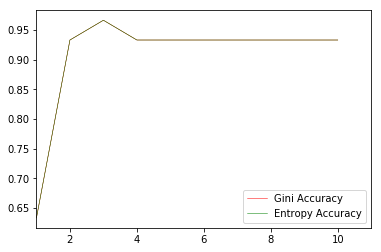

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
treeClsObj = DecisionTreeClassifier(criterion = 'gini') #Declare the classifier object
giniLine = [] #A list to store values of accuracy rate when using gini index
entropyLine = [] #A list to store values of accuracy rate when using entropy
for x in range (1,11,1):
    treeClsObj.max_depth = x
    treeClsObj = treeClsObj.fit(train_x, train_y)
    predt_y = treeClsObj.predict(test_x)
    acc = metrics.accuracy_score(predt_y, test_y) #compare the predicted outcome from tested features to the actual value
    giniLine.append(acc) 
treeClsObj.criterion = 'entropy'
for x in range (1,11,1):
    treeClsObj.max_depth = x
    treeClsObj = treeClsObj.fit(train_x, train_y)
    predt_y = treeClsObj.predict(test_x)
    acc = metrics.accuracy_score(predt_y, test_y)
    entropyLine.append(acc)
plt.plot(range(1,11,1), giniLine, label = 'Gini Accuracy', c= 'r', lw = 0.5) #sketch the line indicate the Gini accuracy with colour red
plt.plot(range(1,11,1), entropyLine, label = 'Entropy Accuracy', c= 'g', lw = 0.5) #sketch the line indicate the Entropy Accuracy with colour blue
plt.xlim(1,11) #set the range for x axis
plt.legend() #enable the legend of the plot 
plt.show() 

Because either using GINI index or Entropy our model will produce similar accurate rate so I will stick with default criterion of DecisionTreeClassifier class which is 'gini'. And at max_depth = 3, our model accuracy get to its peak means less noise and less overfitting in this case. so the depth of the tree will be set at 3.   

In [8]:
finalTree = DecisionTreeClassifier(max_depth = 3)
finalTree.fit(train_x, train_y)
acc = metrics.accuracy_score(finalTree.predict(test_x), test_y)
print(acc)

0.9666666666666667


Accuracu now is 96.67%

In [9]:
!pip install pydotplus
!pip install matplotlib

     |████████████████████████████████| 286kB 2.3MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp36-none-any.whl size=25389 sha256=7e7ce67b37832938b3e790f0da9d1f2cc2d36c01963d8b57ceb89d856adcf502
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


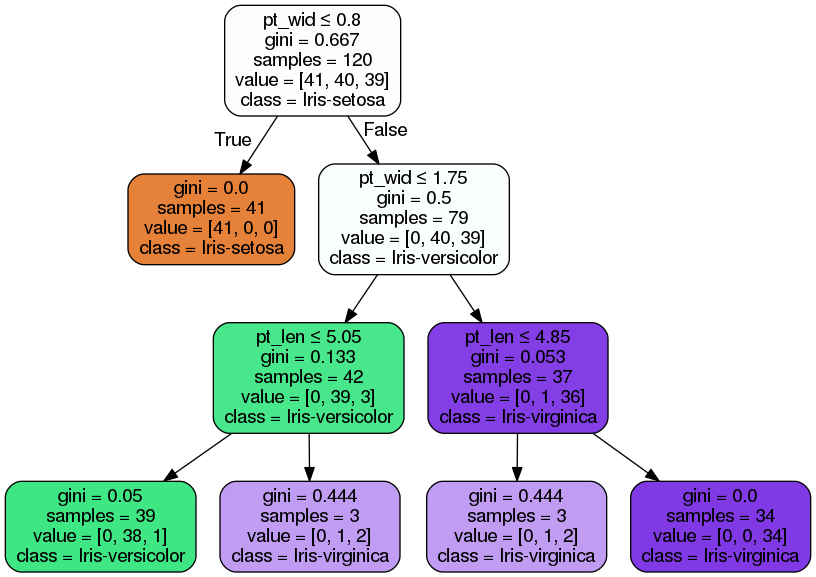

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(finalTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names = treeClsObj.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Above is to draw the decision tree

Each node on the tree is decision block in which there are GINI index which is error rate of each decision on each leaf ?!? (MSA team, correct me if i'm wrong), 'samples' stands for sample size of that block. The first line is the condition of particular feature and class is the decision based on the considered feature condition.
So base on our decision tree model we have our conclusion from end-leafs with least significant GINI index (smaller than 0.05?!?):

-Start at the root of the tree. if petal width of a flower is equal or smaller than 0.8 cm it is "Iris-setosa"

-From the right, if petal length of a flower is larger than 4.85 cm and its petal width is larger than 1.75 cm, the flower is "Iris-virginica".

-If petal length of a flower is equal or smaller than 5.05 cm and its petal width is in range from 0.81 to 1.75 cm, the flower is "Iris-versicolor"

It is significant that the model only considers petal length and petal width features which have high "Class" correlation coefficient. So maybe in further situation when dealing junky data pool with junk of features under supervised learning, we can filter our data frame by determining correlation coefficient for better performance in term of processing speed ?!? (correct me if im wrong hehe)

However, the problem is that our sample size is small and hold-out validation may not be efficient enough. So I will try k-fold cross-validation and leave one out validation

0.9533333333333334


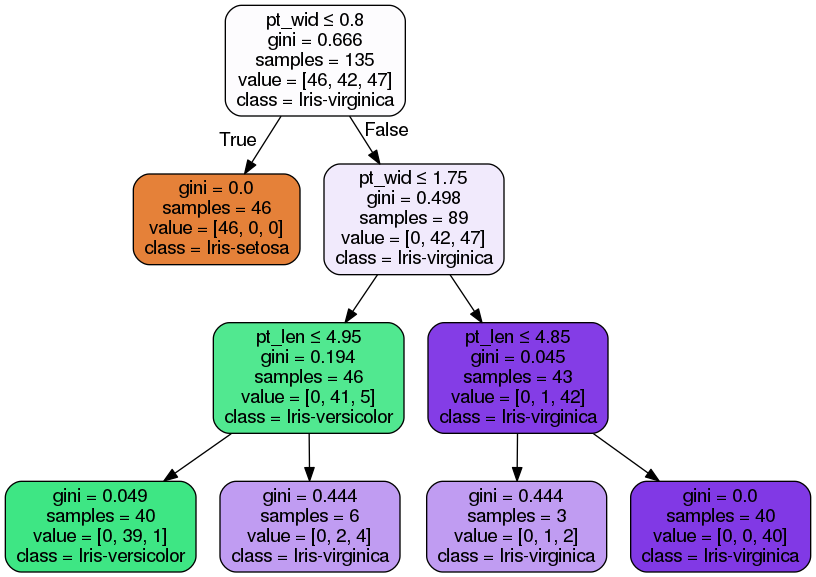

In [42]:
from sklearn.model_selection import KFold
secTree = DecisionTreeClassifier(max_depth = 3)
kFold = KFold(n_splits = 10, shuffle = True) #I use k = 5 here
kFold_ClassLabel = irisData['class']
tmpRes = [] #this to store iterated accuracy rates
for i in range(kFold.get_n_splits(df)): #As k = 5 means we are gonna iterate our data sample five times
    tmp = next(kFold.split(df, None)) #kFlold.split return nested array in format [train index][test index] 
    train_x, train_y = df.iloc[tmp[0]] , kFold_ClassLabel.iloc[tmp[0]] #delare train set 
    test_x, test_y = df.iloc[tmp[1]] , kFold_ClassLabel.iloc[tmp[1]] #declare test set
    secTree.fit(train_x,train_y)
    pre = secTree.predict(test_x)
    acc = metrics.accuracy_score(pre, test_y)
    tmpRes.append(acc)
print(np.mean(tmpRes))
dot_data = StringIO()
export_graphviz(secTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names = treeClsObj.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Mean of accuracy is 0.9533 which is higher than the hold-out training. We have improvement here. Now I will use leave one out cross validation

0.9466666666666667


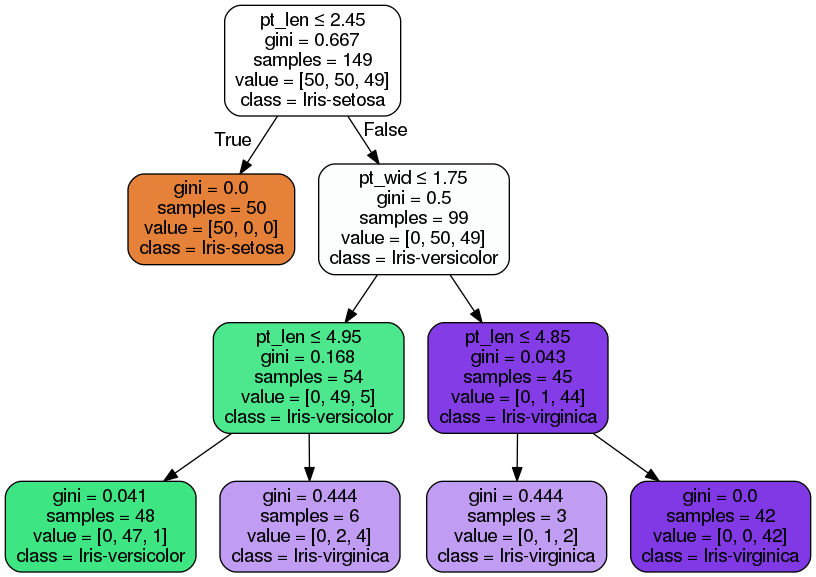

In [44]:
from sklearn.model_selection import LeaveOneOut
rdTree = DecisionTreeClassifier(max_depth = 3)
loocv = LeaveOneOut()
loo_ClassLabel = irisData['class']
tmpLooRes = []
for i in loocv.split(df):
    train_x, train_y = df.iloc[i[0]], loo_ClassLabel.iloc[i[0]]
    test_x, test_y = df.iloc[i[1]] , kFold_ClassLabel.iloc[i[1]]
    rdTree.fit(train_x,train_y)
    pre = rdTree.predict(test_x)
    acc = metrics.accuracy_score(pre, test_y)
    tmpLooRes.append(acc)
print(np.mean(tmpLooRes))
dot_data = StringIO()
export_graphviz(rdTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names = rdTree.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())